In [34]:
import numpy as np
import pandas as pd
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
data = pd.read_csv('nbastat2021.csv')

In [5]:
features = ['FT%', '2P%', '3P%','PPGPointsPoints per game.', 'RPGReboundsRebounds per game.',
       'APGAssistsAssists per game.', 'SPGStealsSteals per game.', 'BPGBlocksBlocks per game.', 'TOPGTurnoversTurnovers per game.']
data_ = data[features]

# 1. Correlation 과 Covariance 구하기

In [70]:
x = np.array(data_)

In [140]:
def covariance(x):
    x = np.array(x)
    matrix = []
    for i in range(len(x)):
        cov = []
        for j in range(len(x)): # Cov(X[i], X[j]) for each i-th, j-th feature in X
            ui = np.mean(x[i])
            uj = np.mean(x[j])
            cov.append(np.sum(np.dot(x[i]- ui, x[j]- uj)) / (len(x[0]) - 1))
        matrix.append(cov)
    return np.array(matrix)

In [141]:
covariance(data_)

array([[ 9.85987086, 10.13058996, 19.35089232, ..., 18.83413456,
        21.91606069, 11.84986253],
       [10.13058996, 12.1856695 , 18.77081733, ..., 18.20469092,
        18.27174846, 12.34535733],
       [19.35089232, 18.77081733, 40.07977728, ..., 38.49328547,
        51.0633959 , 23.18847561],
       ...,
       [18.83413456, 18.20469092, 38.49328547, ..., 37.23279778,
        47.87539972, 22.55085589],
       [21.91606069, 18.27174846, 51.0633959 , ..., 47.87539972,
        81.12768728, 26.00653861],
       [11.84986253, 12.34535733, 23.18847561, ..., 22.55085589,
        26.00653861, 14.29821144]])

In [142]:
def correlation(x):
    x = np.array(x)
    matrix = []
    for i in range(len(x[0])):
        cor = []
        for j in range(len(x[0])):
            ui = np.mean(x[i]) # Mean of i-th feature
            uj = np.mean(x[j]) # Mean of j-th feature
            si = np.sqrt(np.sum((x[i] - ui) ** 2)) # Std of i-th feature
            sj = np.sqrt(np.sum((x[j] - uj) ** 2)) # Std of j-th feature
            cor.append(np.sum((x[i] - ui) * (x[j] - uj)) / (si * sj))
        matrix.append(cor)
        
    return matrix

In [143]:
b = correlation(data_)

In [144]:
b

[[0.9999999999999998,
  0.9242180083192044,
  0.9734255317859004,
  0.9456940706739456,
  0.8678913683973054,
  0.8986099722154787,
  0.9942952438502335,
  0.9752213123073877,
  0.9312314891873246],
 [0.9242180083192044,
  1.0,
  0.8493678851508686,
  0.7627963654705562,
  0.6706523712239544,
  0.6973710965136163,
  0.8866786006408172,
  0.9241993399555597,
  0.7686226539905756],
 [0.9734255317859004,
  0.8493678851508686,
  0.9999999999999998,
  0.9815623178172801,
  0.955931802706691,
  0.9664100157772719,
  0.9873183645433322,
  0.9782260234690405,
  0.9877260485695093],
 [0.9456940706739456,
  0.7627963654705562,
  0.9815623178172801,
  1.0,
  0.9664251197463702,
  0.9861822592884754,
  0.9729693660699693,
  0.9313782872200488,
  0.9870150766930773],
 [0.8678913683973054,
  0.6706523712239544,
  0.955931802706691,
  0.9664251197463702,
  0.9999999999999999,
  0.9909705570705102,
  0.9070226667890046,
  0.8969999711811603,
  0.988121719500223],
 [0.8986099722154787,
  0.697371096513

# 2. Cosine similarity, Minkowski distance, Mahalanobis distance

In [150]:
a = data_.iloc[0]
b = data_.iloc[1]

In [77]:
def cosine_similarity(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.dot(x, y) / (np.sqrt(np.sum(x ** 2)) * np.sqrt(np.sum(y ** 2)))

In [78]:
cosine_similarity(a, b)

0.9525060747573825

In [79]:
def minkowski(x, y, r):
    x = np.array(x)
    y = np.array(y)
    if r == np.inf: 
        return np.max(np.abs(x - y))
    return np.power(np.sum(np.power(np.abs(x - y), r)), 1/r)

In [81]:
minkowski(a, b, 2)

4.048452667377995

In [153]:
def mahalanobis(x, y):
    x = np.array(x)
    y = np.array(y)
    def cov(x): # To calculate covariance of x
        matrix = []
        for i in range(len(x)):
            cov = []
            for j in range(len(x)):
                ui = np.mean(x[i])
                uj = np.mean(x[j])
                cov.append(np.sum(np.dot(x[i]- ui, x[j]- uj)) / (len(x[0]) - 1))
            matrix.append(cov)
        return np.array(matrix)
    covariance = cov(np.stack((x, y), axis=1)) # to calculate covariance of x and y, stacking x and y in one 2d array
    return np.sqrt(np.dot(np.dot((x-y).T, np.linalg.inv(covariance)), (x-y)))

In [154]:
mahalanobis(a, b)

3.1986293939748642

# 3. Mutual Information

In [84]:
def mutual_information(x, y):
    hx = 0
    hy = 0
    hxy = 0
    x = list(x)
    y = list(y)
    for i in set(x):
        p_i = x.count(i) / len(x) # probability of i
        hx -= p_i * np.log2(p_i)  # entropy
    for i in set(y):
        p_i = y.count(i) / len(y) # probability of i
        hy -= p_i * np.log2(p_i) # entropy 
    
    joint_ary = np.array([[x[i], y[i]] for i in range(len(x))])
    joint_ary.sort()
    values, counts = np.unique(joint_ary, axis=0, return_counts=True) # To count number of joint sets
    i = 0
    for idx, value in enumerate(values):
        p_ij = counts[idx] / len(joint_ary) # joint probability
        hxy -= p_ij * np.log2(p_ij) # joint entropy
    return hx, hy, hx + hy - hxy # total entropy of x, total entropy of y, MI of x and y

In [85]:
x = data['POS']
y = data['TEAM']

mutual_information(x, y)

(2.0575955444688696, 4.896210815378615, 0.3612342912010771)

# 4. Mykmeans

In [21]:
def init_center(X, k): # Initialization of centroids
    X = np.array(X)
    m = len(X)
    indexs = np.random.choice(np.arange(m), k)
    centers = []  
    for i in indexs:
        centers.append(X[i])
    return np.array(centers)

In [22]:
c1 = init_center(data_, 5)
c2 = init_center(data_, 3)

l2-norm version

In [136]:
def mykmeans(X, k, c):
    def distance(x, y): # L2-norm
        return np.sqrt(np.sum((x - y) ** 2))
    X =  np.array(X)
    cluster = np.zeros(len(X))
    group = [[] for _ in range(k)] # to store the values of each clusters
    for iter_ in range(100): # within max iteration 100, 
        for i, obj in enumerate(X):
            min_d = np.inf   # initialize min distance
            for idx, center in enumerate(c):
                d = distance(obj, center) # l2 - norm between centroids and objects
                if min_d > d: # If we find better clusters,
                    min_d = d # update minimum distance
                    cluster[i] = int(idx) # update cluster
                    group[idx].append(X[i])
        new = np.zeros_like(c) # new centroids
        for idx, center in enumerate(c):
            new[idx] = np.mean(group[idx], axis=0)
        if distance(new, c) <= 0.001: # if l2-norm between a previous center and an updated center is <= 0.001,
            print(iter_)
            return c, cluster # terminate iteration
        else:
            c = new
    print(iter_)    
    return c, cluster # terminate iteration since the number of iteration reaches 100

In [137]:
center, clusters = mykmeans(data_, 5, c1)

99


In [138]:
center

array([[ 0.78174167,  0.52894167,  0.33033333, 13.75041667,  5.11666667,
         3.09291667,  0.89579167,  0.54545833,  1.60733333],
       [ 0.75535655,  0.54626519,  0.30811327,  8.66432554,  4.35946395,
         1.90957645,  0.79844468,  0.52620953,  0.98830872],
       [ 0.71171288,  0.57603965,  0.23384466,  9.4417412 ,  6.34063804,
         1.62742993,  0.74270722,  0.82452594,  1.02455874],
       [ 0.64184525,  0.61257565,  0.11811898,  8.94140303,  8.80130674,
         2.08954608,  0.76832875,  1.2165956 ,  1.25816369],
       [ 0.81345375,  0.52305575,  0.33409188, 22.84121946,  6.84142827,
         5.51432449,  1.1279787 ,  0.62511798,  2.86802673]])

Text(0.5, 1.0, 'l2 norm')

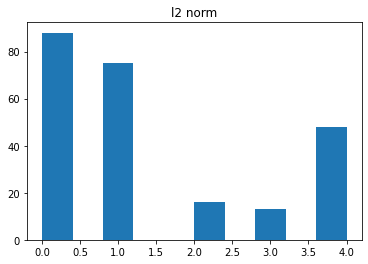

In [139]:
plt.hist(clusters)
plt.title('l2 norm')

Minkowski (r = 2)

In [25]:
def mykmeans_minkowski(X, k, c):
    def distance(x, y): # Minkowski distance
        return np.sqrt(np.sum(np.abs(x - y) ** 2))
    X =  np.array(X)
    min_d = np.inf
    cluster = np.zeros(len(X))
    group = [[] for _ in range(k)] # to store the values of each clusters
    for iter_ in range(100): # within max iteration 100, 
        for i, obj in enumerate(X):
            min_d = np.inf # initialize min distance
            for idx, center in enumerate(c):
                d = distance(obj, center) # minkowski distance between centroids and objects
                if min_d > d: # If we find better clusters,
                    min_d = d # update minimum distance
                    cluster[i] = idx # update cluster
                    group[idx].append(X[i])
        new = np.zeros_like(c) # new centroids
        for idx, center in enumerate(c):
            new[idx] = np.mean(group[idx], axis=0)
        if distance(new, c) <= 0.001:  # if minkowski distance between a previous center and an updated center is <= 0.001,
            print(iter_)
            return c, cluster # terminate iteration
        else:
            c = new
    print(iter_)    
    return c, cluster # terminate iteration since the number of iteration reaches 100

In [43]:
center2, cluster2 = mykmeans_minkowski(data_, 5, c1)
center3, cluster3 = mykmeans_minkowski(data_, 3, c2)

99


In [61]:
center2

array([[ 0.78174167,  0.52894167,  0.33033333, 13.75041667,  5.11666667,
         3.09291667,  0.89579167,  0.54545833,  1.60733333],
       [ 0.75535655,  0.54626519,  0.30811327,  8.66432554,  4.35946395,
         1.90957645,  0.79844468,  0.52620953,  0.98830872],
       [ 0.71171288,  0.57603965,  0.23384466,  9.4417412 ,  6.34063804,
         1.62742993,  0.74270722,  0.82452594,  1.02455874],
       [ 0.64184525,  0.61257565,  0.11811898,  8.94140303,  8.80130674,
         2.08954608,  0.76832875,  1.2165956 ,  1.25816369],
       [ 0.81345375,  0.52305575,  0.33409188, 22.84121946,  6.84142827,
         5.51432449,  1.1279787 ,  0.62511798,  2.86802673]])

In [62]:
center3

array([[ 0.78174167,  0.52894167,  0.33033333, 13.75041667,  5.11666667,
         3.09291667,  0.89579167,  0.54545833,  1.60733333],
       [ 0.75691337,  0.54496398,  0.3091625 ,  8.72392432,  4.34386285,
         1.90368805,  0.79898963,  0.52398579,  0.99110353],
       [ 0.80723008,  0.52395154,  0.33431382, 22.4       ,  6.87373522,
         5.33068424,  1.10346773,  0.63410351,  2.79234542]])

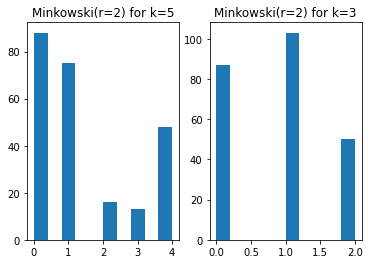

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(cluster2)
ax[0].title.set_text('Minkowski(r=2) for k=5')
ax[1].hist(cluster3)
ax[1].title.set_text('Minkowski(r=2) for k=3')

In [94]:
def mykmeans_cosine(X, k, c):
    def distance(x, y): # Cosine similarity
        return np.dot(x, y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
    X =  np.array(X)
    min_d = np.inf
    cluster = np.zeros(len(X))
    group = [[] for _ in range(k)] # to store the values of each clusters
    for iter_ in range(100): # within max iteration 100,
        for i, obj in enumerate(X):
            min_d = np.inf # initialize minimum distance
            for idx, center in enumerate(c):
                d = distance(obj, center) # to calculate cosine similarity between centroids and objects
                if min_d > d: # if we find better clusters, 
                    min_d = d # update minimum distance
                    cluster[i] = idx # update cluster
                    group[idx].append(X[i])
        new = np.zeros_like(c) # new centroids
        for idx, center in enumerate(c):
            new[idx] = np.mean(group[idx], axis=0)
        if (distance(new[i], c[i]) <= 0.001 for i in range(len(c))): # if cosine similarity between a previous center and an updated center is <= 0.001,
            print(iter_)
            return c, cluster # terminate iteration
        else:
            c = new
    print(iter_)    
    return c, cluster # terminate iteration since the number of iteration reaches 100

In [95]:
center4, cluster4 = mykmeans_cosine(data_, 5, c1)
center5, cluster5 = mykmeans_cosine(data_, 3, c2)

0


In [96]:
center4

array([[ 0.846,  0.499,  0.39 , 16.1  ,  4.6  ,  3.6  ,  0.96 ,  0.46 ,
         1.67 ],
       [ 0.6  ,  0.434,  0.375, 14.1  ,  4.1  ,  6.   ,  1.14 ,  0.35 ,
         3.31 ],
       [ 0.837,  0.619,  0.299, 10.3  ,  3.2  ,  1.3  ,  0.36 ,  0.38 ,
         0.97 ],
       [ 0.745,  0.538,  0.242,  9.3  ,  7.2  ,  0.6  ,  0.3  ,  0.37 ,
         0.7  ],
       [ 0.763,  0.543,  0.414, 18.4  ,  4.6  ,  6.7  ,  1.62 ,  0.45 ,
         2.79 ]])

In [98]:
center5

array([[ 0.778,  0.509,  0.354, 21.1  ,  4.7  ,  3.7  ,  1.55 ,  0.71 ,
         2.68 ],
       [ 0.9  ,  0.421,  0.379, 11.9  ,  2.5  ,  1.1  ,  1.03 ,  0.32 ,
         1.29 ],
       [ 0.735,  0.54 ,  0.314, 15.5  ,  7.7  ,  3.4  ,  1.16 ,  0.81 ,
         1.9  ]])

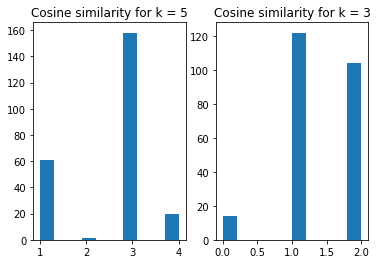

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(cluster4)
ax[0].title.set_text('Cosine similarity for k = 5')
ax[1].hist(cluster5)
ax[1].title.set_text('Cosine similarity for k = 3')

In [127]:
def mykmeans_mahalanobis(X, k, c):
    def distance(x, y): # Mahalanobis distance
        def cov(x): # To calculate covariance
            matrix = []
            for i in range(len(x)):
                cov = []
                for j in range(len(x)):
                    cov.append(np.sum(np.dot(x[i]- np.mean(x[i]), x[j]- np.mean(x[j]))) / (len(x[0]) - 1))
                matrix.append(cov)
            return np.array(matrix)
        
        covariance = cov(np.stack((x, y), axis=1))
        return np.sqrt(np.dot(np.dot((x-y).T, np.linalg.pinv(covariance)), (x-y)))
    
    X =  np.array(X)
    min_d = np.inf
    cluster = np.zeros(len(X))
    group = [[] for _ in range(k)] # to store the values of each clusters
    for iter_ in range(100): # within max iteration 100,
        for i, obj in enumerate(X):
            min_d = np.inf # initialize minimum distance
            for idx, center in enumerate(c):
                d = distance(obj, center) # to calculate mahalanobis distance
                if min_d > d: # if we find better cluster,
                    min_d = d # update minimum distance
                    cluster[i] = idx # update cluster
                    group[idx].append(X[i])
        new = np.zeros_like(c) # new centroids
        for idx, center in enumerate(c):
            new[idx] = np.mean(group[idx], axis=0)
        if (distance(new[i], c[i]) <= 0.001 for i in range(len(c))): # if mahalanobis distance between a previous center and an updated center is <= 0.001,
            print(iter_)
            return c, cluster # terminate iteration
        else:
            c = new
    print(iter_)    
    return c, cluster # terminate iteration since the number of iteration reaches 100.

In [129]:
center6, cluster6 = mykmeans_mahalanobis(data_, 5, c1)
center7, cluster7 = mykmeans_mahalanobis(data_, 3, c2)

0


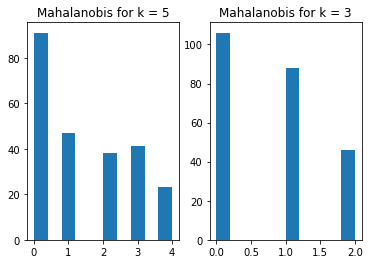

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(cluster6)
ax[0].title.set_text('Mahalanobis for k = 5')
ax[1].hist(cluster7)
ax[1].title.set_text('Mahalanobis for k = 3')